- x
- x,y=y
- x,y=y,interest=interest


There are three differenf modes:

1) Interested to see anomalies
    - There should be a reserved class for non-seen data points
    - The scores can be used as anomaly rank and determine suggestion prioroty
2) Interested to see one specific class (more likly an anomalous class)
    - It should be chosen from the existing classes
    - The score is what NN predict as class probability
3) Interested into more than one class
    - They should be in the existing classes
    - User is able to choose weight of being interesting
    
for all of the scenarios, the label map must be compatible.


In [1]:
import numpy as np
import pylab as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import regularizers
# from tensorflow.keras import backend as K
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import recall_score,precision_score,classification_report,confusion_matrix,matthews_corrcoef

import sys
# sys.path.insert(0,'./')
# sys.path
import ahunt as ah

# def iforest_get_anomalies(z):
#     isof = IsolationForest()
#     isof.fit(z)
#     scores_pred = isof.decision_function(z)
#     scores_pred = scores_pred.max()-scores_pred
#     return scores_pred

aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.04,
    height_shift_range=0.04,
#     brightness_range=0.01,
#        shear_range=0.0,
    zoom_range=0.04,
#     horizontal_flip=True,
#     vertical_flip=True,
    fill_mode="nearest")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


outlier is  class5
{0: 500, 1: 900}
{0: 170, 1: 200, 5: 6}
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 


/home/vafaeisa/projects/anomaly2/ahunt/simulation.py:418: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  z_mus = np.array(z_mus),
/home/vafaeisa/projects/anomaly2/ahunt/simulation.py:419: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lbls = np.array(lbls),
/home/vafaeisa/projects/anomaly2/ahunt/simulation.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' whe

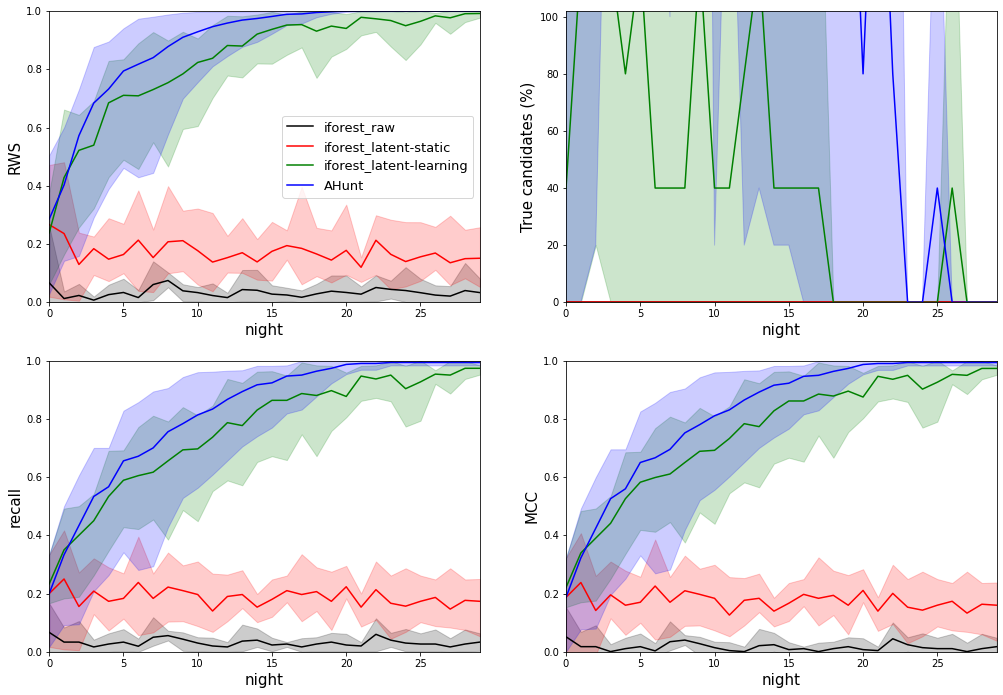

In [2]:
fname = 'mnist'
ntry = 5
n_night = 30
epochs = 5
noise = 0.1
outlier_ind = 5

n_questions = 0.5 # can be an integer or an array of numbers np.random.randint(3,7,n_night)

pre_data_config = {0:500,1:900}
obs_plan = 10*[{0:170,1:200,outlier_ind:6}]#+10*[{0:170,1:200,outlier_ind:5,6:7}]+10*[{0:170,1:200,outlier_ind:4,7:20,8:100}]

n_questions = ah.run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      n_night=n_night,
                      nightly=False,
                      ntry = ntry,
                      givey = True,
                      n_questions = n_questions,
#                       n_class = 3,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      nmin_pre=None,
                      prefix='figs/plan_zmu-')
z_mus,lbls = ah.plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan_zmu-')

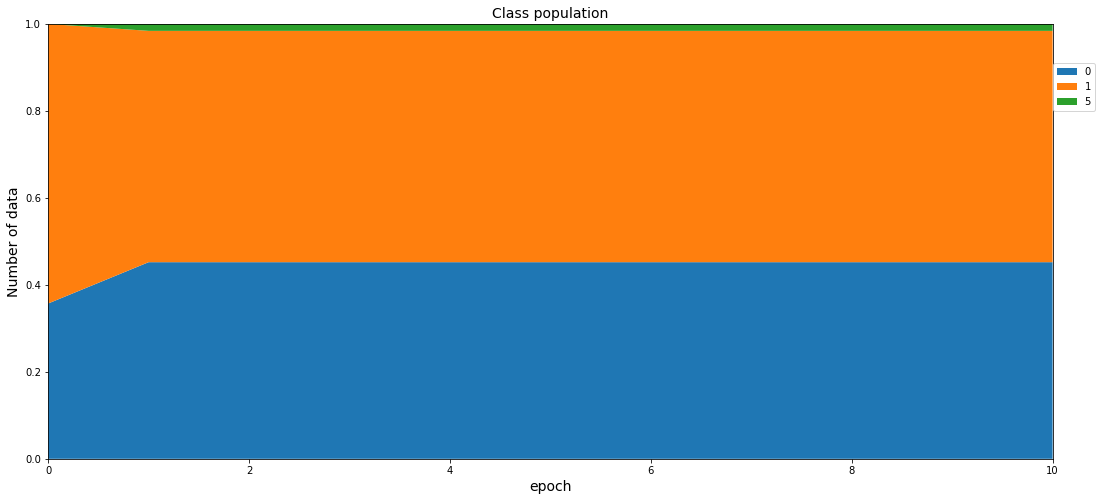

In [4]:
plan_tot = [pre_data_config]+obs_plan
population_by_group = ah.plot_population(plan_tot)

In [4]:
path = '/home/vafaeisa/scratch/datasets/prepared/cifar10.npz'
x,y,int_mapper,lbl_mapper = ah.load_npz(path,verbose=1)

(60000, 32, 32, 3) (60000,)
labels/numbers are:
	airplane     /  6000
 	automobile   /  6000
 	bird         /  6000
 	cat          /  6000
 	deer         /  6000
 	dog          /  6000
 	frog         /  6000
 	horse        /  6000
 	ship         /  6000
 	truck        /  6000



In [ ]:
fname = 'cifar10'
ntry = 5
n_night = 50
epochs = 10
noise = 0.0
outlier_ind = 5

n_questions = 7 # can be an integer or an array of numbers np.random.randint(3,7,n_night)

# pre_data_config = {0:500,1:900}
# obs_plan = 10*[{0:170,1:200,outlier_ind:6}]#+10*[{0:170,1:200,outlier_ind:5,6:7}]+10*[{0:170,1:200,outlier_ind:4,7:20,8:100}]
# n_questions = np.random.randint(3,7,n_night)
outlier_ind = lbl_mapper['bird']

pre_data_config = {lbl_mapper['airplane']:400,lbl_mapper['automobile']:300}
obs_plan = 10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:10}] + \
           10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:10,lbl_mapper['ship']:7}]#+ \
#            10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:4,lbl_mapper['horse']:20,lbl_mapper['truck']:100}]

n_questions = ah.run_for(fname=fname,
                         epochs = epochs,
                         noise = noise,
                         n_night=n_night,
                         nightly=False,
                         ntry = ntry,
                         givey = True,
                         n_questions = n_questions,
    #                      n_class = 3,
                         outlier_ind = outlier_ind,
                         pre_data_config = pre_data_config,
                         obs_plan = obs_plan,
                         nmin_pre=None,
                         prefix='figs/cifar7q-')
z_mus,lbls = ah.plot_for(fname=fname,n_questions=n_questions,prefix='figs/cifar7q-')

outlier is  bird
{0: 400, 1: 300}
{0: 170, 1: 200, 2: 10}
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 


In [ ]:
fname = 'cifar10'
ntry = 5
n_night = 50
epochs = 10
noise = 0.0
outlier_ind = 5

n_questions = 3 # can be an integer or an array of numbers np.random.randint(3,7,n_night)

# pre_data_config = {0:500,1:900}
# obs_plan = 10*[{0:170,1:200,outlier_ind:6}]#+10*[{0:170,1:200,outlier_ind:5,6:7}]+10*[{0:170,1:200,outlier_ind:4,7:20,8:100}]
# n_questions = np.random.randint(3,7,n_night)
outlier_ind = lbl_mapper['bird']

pre_data_config = {lbl_mapper['airplane']:400,lbl_mapper['automobile']:300}
obs_plan = 10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:10}] + \
           10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:10,lbl_mapper['ship']:7}]#+ \
#            10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:4,lbl_mapper['horse']:20,lbl_mapper['truck']:100}]

n_questions = ah.run_for(fname=fname,
                         epochs = epochs,
                         noise = noise,
                         n_night=n_night,
                         nightly=False,
                         ntry = ntry,
                         givey = True,
                         n_questions = n_questions,
    #                      n_class = 3,
                         outlier_ind = outlier_ind,
                         pre_data_config = pre_data_config,
                         obs_plan = obs_plan,
                         nmin_pre=None,
                         prefix='figs/cifar3q-')
z_mus,lbls = ah.plot_for(fname=fname,n_questions=n_questions,prefix='figs/cifar3q-')

(60000, 32, 32, 3) (60000,)
labels/numbers are:
	airplane     /  6000
 	automobile   /  6000
 	bird         /  6000
 	cat          /  6000
 	deer         /  6000
 	dog          /  6000
 	frog         /  6000
 	horse        /  6000
 	ship         /  6000
 	truck        /  6000

outlier is  bird
{0: 400, 1: 300}
{0: 170, 1: 200, 2: 6}
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 


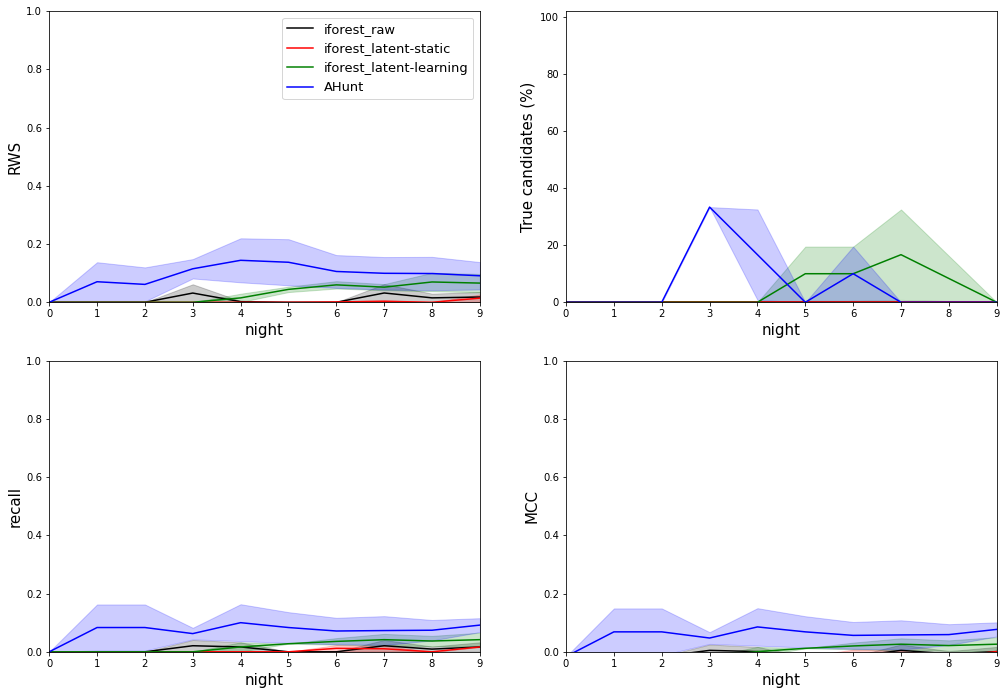

In [4]:
# path = '/home/vafaeisa/scratch/datasets/prepared/cifar10.npz'
# x,y,int_mapper,lbl_mapper = ah.load_npz(path,verbose=1)

# fname = 'cifar10'
# epochs = 10
# noise = 0.1
# n_night = 10

# n_questions = np.random.randint(3,7,n_night)
# outlier_ind = lbl_mapper['bird']

# pre_data_config = {lbl_mapper['airplane']:400,lbl_mapper['automobile']:300}
# obs_plan = 10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:6}] #+ \
# #            10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:5,lbl_mapper['ship']:7}]+ \
# #            10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:4,lbl_mapper['horse']:20,lbl_mapper['truck']:100}]

# n_questions = ah.run_for(fname=fname,
#                          epochs = epochs,
#                          noise = noise,
#                          n_night=n_night,
#                          nightly=False,
#                          ntry = 2,
#                          givey = True,
#                          n_questions = n_questions,
#     #                      n_class = 3,
#                          outlier_ind = outlier_ind,
#                          pre_data_config = pre_data_config,
#                          obs_plan = obs_plan,
#                          nmin_pre=None,
#                          prefix='figs/cifar-')
# z_mus,lbls = ah.plot_for(fname=fname,n_questions=n_questions,prefix='figs/cifar-')

In [ ]:
fname = 'mnist'
epochs = 10
noise = 0.1
n_questions = np.random.randint(3,7,n_night)
outlier_ind = 5

pre_data_config = {0:800,1:900}
obs_plan = 10*[{0:170,1:200,outlier_ind:6}]+10*[{0:170,1:200,outlier_ind:5,6:7}]+10*[{0:170,1:200,outlier_ind:4,7:20,8:100}]

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      n_night=30,
                      nightly=False,
                      ntry = 10,
                      givey = False,
                      n_questions = n_questions,
#                       n_class = 3,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      nmin_pre=None,
                      prefix='figs/nog-')
z_mus,lbls = plot_for(fname=fname,n_questions=n_questions,prefix='figs/nog-')

In [12]:
pre_data_config = {0:800,1:900}
obs_plan = 10*[{0:170,1:200,outlier_ind:6}]+10*[{0:170,1:200,outlier_ind:5,6:7}]+10*[{0:170,1:200,outlier_ind:4,7:20,8:100}]
plan_tot = [pre_data_config]+obs_plan
# np.union1d(*)

In [ ]:
import umap

z_mus,lbls = plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan_zmu-')

xs = z_mus[0]
ys = lbls[0]
n_night = len(xs)

drtp = umap.UMAP(random_state=42)
drtp.fit(xs[n_night-1])

for ni in range(n_night):
    p1,p2 = drtp.transform(xs[ni]).T
    plt.scatter(p1,p2,c=ys[ni])
    plt.savefig('latent-'+str(ni)+'.jpg',dpi=100)
    plt.close()
    print(ni)

In [5]:
# from sklearn.manifold import TSNE
# import umap

# z_mus,lbls = plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan_zmu-')

# xs = z_mus[0]
# ys = lbls[0]
# n_night = len(xs)

# # drtp = TSNE(n_components=2,random_state=0).fit(xs[n_night-1])
# drtp = umap.UMAP(random_state=42)
# drtp.fit(xs[n_night-1])
# # %time u = fit.fit_transform(data)


# for ni in range(n_night):
# #     p1,p2 = TSNE(n_components=2,random_state=0).fit_transform(xs[ni]).T
#     p1,p2 = drtp.transform(xs[ni]).T
#     plt.scatter(p1,p2,c=ys[ni])
#     plt.savefig('latent-'+str(ni)+'.jpg',dpi=100)
#     plt.close()
#     print(ni)

In [3]:
path = '/home/vafaeisa/scratch/datasets/prepared/cifar10.npz'
x,y,int_mapper,lbl_mapper = ah.load_npz(path,verbose=1)

(60000, 32, 32, 3) (60000,)
labels/numbers are:
	airplane     /  6000
 	automobile   /  6000
 	bird         /  6000
 	cat          /  6000
 	deer         /  6000
 	dog          /  6000
 	frog         /  6000
 	horse        /  6000
 	ship         /  6000
 	truck        /  6000



In [4]:
fname = 'cifar10'
epochs = 10
noise = 0.1
n_night = 30

n_questions = np.random.randint(3,7,n_night)
outlier_ind = lbl_mapper['bird']

pre_data_config = {lbl_mapper['airplane']:500,lbl_mapper['automobile']:900}
obs_plan = 10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:6}]+ \
           10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:5,lbl_mapper['ship']:7}]+ \
           10*[{lbl_mapper['airplane']:170,lbl_mapper['automobile']:200,outlier_ind:4,lbl_mapper['horse']:20,lbl_mapper['truck']:100}]

n_questions = ah.run_for(fname=fname,
                         epochs = epochs,
                         noise = noise,
                         n_night=n_night,
                         nightly=False,
                         ntry = 2,
                         givey = True,
                         n_questions = n_questions,
    #                      n_class = 3,
                         outlier_ind = outlier_ind,
                         pre_data_config = pre_data_config,
                         obs_plan = obs_plan,
                         nmin_pre=None,
                         prefix='figs/cifar-')
z_mus,lbls = ah.plot_for(fname=fname,n_questions=n_questions,prefix='figs/cifar-')

outlier is  bird
{0: 500, 1: 900}
{0: 170, 1: 200, 2: 6}
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 


AttributeError: 'int' object has no attribute 'shape'

In [86]:
path = '/home/vafaeisa/scratch/datasets/prepared/retinamnist.npz'
x,y,int_mapper,lbl_mapper = load_npz(path,verbose=1)
x.shape

(1600, 28, 28, 3) (1600,)
labels/numbers are:
	class0   /   714
 	class1   /   186
 	class2   /   326
 	class3   /   282
 	class4   /    92



(1600, 28, 28, 3)

In [ ]:
# from glob import glob
# pp = '/home/vafaeisa/scratch/datasets/prepared/'
# for path in glob(pp+'/*.npz'):
# #     path = sarscov2-ctscan_64_64.npz'
#     print(path)
#     load_npz(path,verbose=1);




In [ ]:
path = '/home/vafaeisa/scratch/datasets/prepared/sarscov2-ctscan_64_64.npz'
load_npz(path,verbose=1);

In [ ]:
# fname = 'mnist'
# epochs = 10
# noise = 0.1
# n_questions = 5
# outlier_ind = 5

# pre_data_config = {0:800,1:900,outlier_ind:0}
# obs_plan = 20*[{0:170,1:200,outlier_ind:7}]

# n_questions = run_for(fname=fname,
#                       epochs = epochs,
#                       noise = noise,
#                       n_night=20,
#                       nightly=False,
#                       ntry = 20,
#                       n_questions = n_questions,
# #                       n_class = 3,
#                       outlier_ind = outlier_ind,
#                       pre_data_config = pre_data_config,
#                       obs_plan = obs_plan,
#                       nmin_pre=None,
#                       prefix='figs/plan1-')
# z_mus,lbls = plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan1-')

In [41]:
1508-1131

377

In [ ]:
fname = 'mnist'
epochs = 5
noise = 0.1
n_questions = 5
outlier_ind = 5

pre_data_config = {0:800,1:900,outlier_ind:0,4:0}
obs_plan = 20*[{0:170,1:200,outlier_ind:7,4:10}]

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      nightly=False,
                      ntry = 50,
                      n_questions = n_questions,
#                       n_class = 3,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      nmin_pre=None,
                      prefix='figs/plan2-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan2-')

In [ ]:
fname = 'mnist'
epochs = 5
noise = 0.1
n_questions = 5
outlier_ind = 5

pre_data_config = {0:800,1:900,outlier_ind:0,4:0,3:0}
obs_plan = 20*[{0:170,1:200,outlier_ind:7,4:10,3:10}]

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      nightly=False,
                      ntry = 50,
                      n_questions = n_questions,
#                       n_class = 3,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      nmin_pre=None,
                      prefix='figs/plan3-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan3-')

In [ ]:
fname = 'mnist'
epochs = 5
noise = 0.1
n_questions = 5
outlier_ind = 5

pre_data_config = {0:800,1:900,outlier_ind:0,4:0,3:0,9:200,8:10}
obs_plan = 20*[{0:170,1:200,outlier_ind:7,4:10,3:10,9:150,8:180}]

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      nightly=False,
                      ntry = 50,
                      n_questions = n_questions,
#                       n_class = 3,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      nmin_pre=None,
                      prefix='figs/plan4-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/plan4-')

In [14]:
2

2

In [6]:
# pre_data_config+obs_plan

Text(0, 0.5, 'Number of data')

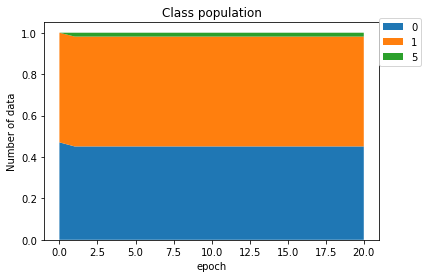

In [77]:
plan_tot = [pre_data_config]+obs_plan
epoches = np.arange(len(plan_tot))
population_by_group = {}
for key in plan_tot[0].keys():
    population_by_group[key] = []
for i in plan_tot:
    nn = 0
    for key in i.keys():
        xx = i[key]
        population_by_group[key].append(xx)
        nn += xx
    for key in i.keys():
        xx = i[key]
        population_by_group[key][-1] = population_by_group[key][-1]/nn

fig, ax = plt.subplots()
ax.stackplot(epoches, population_by_group.values(),
             labels=population_by_group.keys(),)
ax.legend(loc=(1,0.8))
ax.set_title('Class population')
ax.set_xlabel('epoch')
ax.set_ylabel('Number of data')


In [10]:
path = '/home/vafaeisa/scratch/datasets/prepared/sarscov2-ctscan_64_64.npz'
load_npz(path,verbose=1);

(2481, 64, 64) (2481,)
labels/numbers are:
	COVID       /  1252
 	non_COVID   /  1229



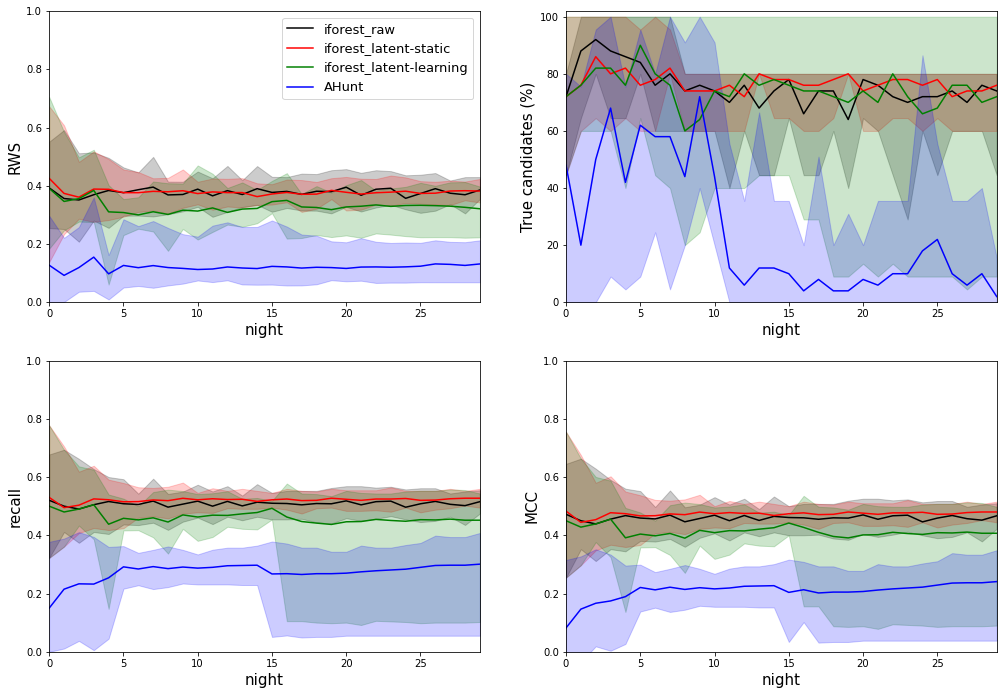

In [17]:
fname = 'sarscov2-ctscan_64_64'
epochs = 5
noise = 0.0
n_questions = 5
pre_data_config = {0:0,1:100}
obs_plan = 11*[{0:10,1:100}]
outlier_ind = 0

# n_questions = run_for(fname=fname,
#                       epochs = epochs,
#                       noise = noise,
#                       n_night = 30,
#                       nightly=False,
#                       ntry = 10,
#                       n_questions = n_questions,
#                       outlier_ind = outlier_ind,
#                       pre_data_config = pre_data_config,
#                       obs_plan = obs_plan,
#                       aug = aug,
#                       nmin_pre=None,
#                       prefix='figs/all-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/all-')

outlier is  COVID
{0: 100, 1: 0}
{0: 100, 1: 10}
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuration:
 ******** previous dataset ******** 
 ******** Observation begins ******** 
Loaded data configuratio

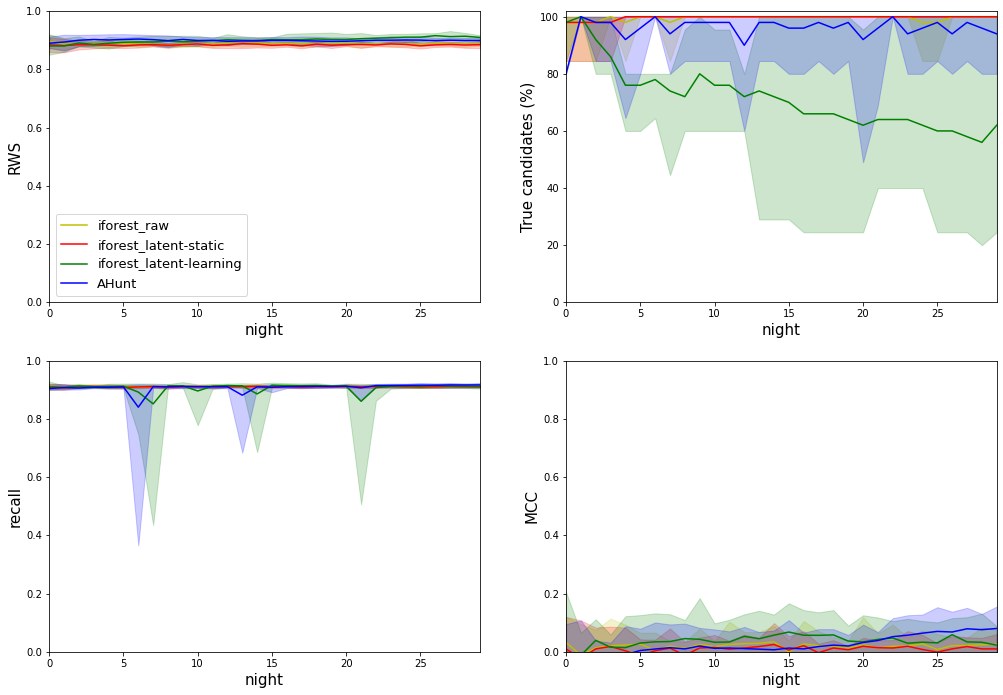

In [13]:
fname = 'sarscov2-ctscan_64_64'
epochs = 5
noise = 0.0
n_questions = 5
pre_data_config = {0:100,1:0}
obs_plan = 11*[{0:100,1:10}]
outlier_ind = 0

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      n_night = 30,
                      nightly=False,
                      ntry = 10,
                      n_questions = n_questions,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      aug = aug,
                      nmin_pre=None,
                      prefix='figs/all-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/all-')

In [14]:
path = '/home/vafaeisa/scratch/datasets/prepared/pneumoniamnist.npz'
load_npz(path,verbose=1);

(5856, 28, 28) (5856,)
labels/numbers are:
	class0   /  1583
 	class1   /  4273



In [ ]:
fname = 'pneumoniamnist'
epochs = 5
noise = 0.0
n_questions = 5
pre_data_config = {0:1,1:100}
obs_plan = 11*[{0:10,1:100}]
outlier_ind = 0

n_questions = run_for(fname=fname,
                      epochs = epochs,
                      noise = noise,
                      n_night = 30,
                      nightly=False,
                      ntry = 10,
                      n_questions = n_questions,
                      outlier_ind = outlier_ind,
                      pre_data_config = pre_data_config,
                      obs_plan = obs_plan,
                      aug = aug,
                      nmin_pre=None,
                      prefix='figs/all-')
plot_for(fname=fname,n_questions=n_questions,prefix='figs/all-')

In [35]:
path = '/home/vafaeisa/scratch/datasets/prepared/mnist.npz'

x,y,int_mapper,lbl_mapper = load_npz(path,verbose=0)
x = x/x.max()
n_tot,lx,ly = x.shape
_,_,x,y = data_prepare(x,y,data_config={0:1000,1:1000},warning=True)

In [36]:
x.shape,y.shape

((2000, 28, 28), (2000,))

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

def VAE(shape = (28, 28, 1),latent_dim = 2,l1 = 1e-10):
    
    original_dim = np.prod(shape[:-1])
    print(original_dim)
    input_img = keras.Input(shape=shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    #     x = layers.MaxPooling2D((2, 2), padding='same')(x)
    #     x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    sh = x.shape[1:]
#     print(sh)
    x = layers.Flatten()(x)
    
    x = layers.Dense(2, activation='softmax',
                activity_regularizer=regularizers.l1(l1))(x)

#     latent_dim = np.prod(sh)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_sigma = layers.Dense(latent_dim)(x)

    def sampling(args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                  mean=0., stddev=0.1)
        return z_mean + K.exp(z_log_sigma) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

    # Create encoder
    encoder = keras.Model(input_img, [z_mean, z_log_sigma, z], name='encoder')

    # Create decoder
    # latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
    # x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
    # outputs = layers.Dense(original_dim, activation='sigmoid')(x)

    latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')

    x = layers.Dense(np.prod(sh), activation='relu',
                activity_regularizer=regularizers.l1(l1))(latent_inputs)
    
    x = layers.Reshape(sh)(x)

    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    #     x = layers.UpSampling2D((2, 2))(x)
    #     x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)

    decoder = keras.Model(latent_inputs, decoded, name='decoder')

    # instantiate VAE model
    decoded = decoder(encoder(input_img)[2])
    vae = keras.Model(input_img, decoded, name='vae_mlp')

#     reconstruction_loss = keras.losses.binary_crossentropy(input_img, decoded)
    reconstruction_loss = keras.losses.mse(input_img, decoded)
    reconstruction_loss *= original_dim
    
    kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    reconstruction_loss = K.mean(reconstruction_loss, axis=(-2,-1))
    
    vae_loss =  reconstruction_loss + kl_loss
    vae_loss = K.mean(vae_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    
    return encoder,decoder,vae

# encoder,decoder,vae = VAE(shape = (28, 28, 1),latent_dim = 2,l1 = 1e-10)
# # encoder2,decoder2,vae2 = VAE(shape = (28, 28, 1),latent_dim = 3,l1 = 1e-10)

# H = vae.fit(x[:,:,:,None], x[:,:,:,None],
#             epochs=100,
#             batch_size=512,
#             verbose=0
#             )
# y_pred = encoder.predict(x)[2]
# y_pred = np.argmax(y_pred,axis=1)



# plt.plot(H.history['loss'])
# # plt.plot(H.history['val_loss'])

In [32]:
# for layer in vae2.layers:
#     print(layer)

In [33]:
# vae2.summary()

In [148]:
x.shape

(2000, 28, 28)

In [ ]:
y_pred = encoder.predict(x)[2]
# y_pred = np.argmax(y_pred,axis=1)

In [38]:
y_pred = encoder.predict(x)[2]
rec = autoencoder.predict(x)
plt.imshow(rec[0,:,:,0])

NameError: name 'autoencoder' is not defined

In [39]:
y_pred.shape

(2000, 2)

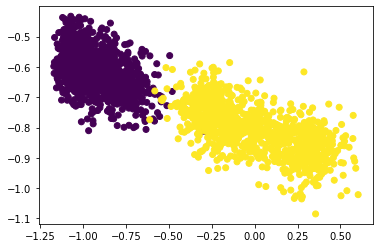

In [40]:
plt.scatter(*y_pred.T,c=y)

In [6]:
import tensorflow as tf

In [10]:
wieghts = tf.constant([5.0, np.nan, 6.8, np.nan, np.inf])
nans = tf.math.is_nan(wieghts)
nnans = tf.math.logical_not(nans)
print(nans,nnans)
print(wieghts[nnans])

tf.Tensor([False  True False  True False], shape=(5,), dtype=bool) tf.Tensor([ True False  True False  True], shape=(5,), dtype=bool)
tf.Tensor([5.  6.8 inf], shape=(3,), dtype=float32)


In [16]:
from ahunt import load_npz,data_prepare

In [53]:
path = '/home/vafaeisa/scratch/datasets/prepared/mnist.npz'

x,y,int_mapper,lbl_mapper = load_npz(path,verbose=0)
x = x/x.max()
n_tot,lx,ly = x.shape
_,_,x,y = data_prepare(x,y,data_config={0:1000,1:1000,2:1000},warning=True)

# $D_{KL}[N(\mu(X), \Sigma(X)) \Vert N(0, 1)] = \frac{1}{2} \sum_k \left( \exp(\Sigma(X)) + \mu^2(X) - 1 - \Sigma(X) \right)$

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

def weighted_categorical_crossentropy(y_true, y_pred, weights):
    # scale predictions so that the class probas of each sample sum to 1
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # calc
    loss = y_true * K.log(y_pred) 
    loss = -K.sum(loss, -1)* weights
    return loss

def VAES(shape = (28, 28, 1),latent_dim = 2,l1 = 1e-10):
    
    original_dim = np.prod(shape[:-1])
    print(original_dim)
    input_img = keras.Input(shape=shape)
    labels = keras.Input(shape=(latent_dim,))
    wieghts = keras.Input(shape=())
    
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    #     x = layers.MaxPooling2D((2, 2), padding='same')(x)
    #     x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    sh = x.shape[1:]
#     print(sh)
    x = layers.Flatten()(x)
    
    x = layers.Dense(latent_dim, activation='softmax',
                activity_regularizer=regularizers.l1(l1))(x)

#     latent_dim = np.prod(sh)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_sigma = layers.Dense(latent_dim)(x)

    def sampling(args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                  mean=0., stddev=0.1)
        return z_mean + K.exp(z_log_sigma) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

    # Create encoder
    encoder = keras.Model(input_img, [z_mean, z_log_sigma, z], name='encoder')

    # Create decoder
    # latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
    # x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
    # outputs = layers.Dense(original_dim, activation='sigmoid')(x)

    latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')

    x = layers.Dense(np.prod(sh), activation='relu',
                activity_regularizer=regularizers.l1(l1))(latent_inputs)
    
    x = layers.Reshape(sh)(x)

    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    #     x = layers.UpSampling2D((2, 2))(x)
    #     x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(l1))(x)

    decoder = keras.Model(latent_inputs, decoded, name='decoder')

    # instantiate VAE model
    decoded = decoder(encoder(input_img)[2])
    vae = keras.Model([input_img,labels,wieghts], decoded, name='vae_mlp')

#     reconstruction_loss = keras.losses.binary_crossentropy(input_img, decoded)
    reconstruction_loss = keras.losses.mse(input_img, decoded)
    reconstruction_loss *= original_dim
    reconstruction_loss = K.mean(reconstruction_loss, axis=(-2,-1))
    
    kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    nans = tf.math.is_nan(wieghts)
    nnans = tf.math.logical_not(nans)
#     print(labels.shape, z.shape, wieghts.shape)
    supervision_loss = weighted_categorical_crossentropy(labels, z, wieghts)
#     keras.losses.categorical_crossentropy(labels[nnans], z[nnans])
#     weights = K.variable(weights)
#     print(reconstruction_loss.shape,kl_loss.shape,supervision_loss.shape)
#     vae_loss =  reconstruction_loss + kl_loss + supervision_loss
    vae_loss =  reconstruction_loss + supervision_loss

    vae_loss = K.mean(vae_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    
    return encoder,decoder,vae

encoder,decoder,vae = VAES(shape = (28, 28, 1),latent_dim = 3,l1 = 1e-10)
# # encoder2,decoder2,vae2 = VAE(shape = (28, 28, 1),latent_dim = 3,l1 = 1e-10)
y_true = to_categorical(y)
print(x[:,:,:,None].shape,y_true.shape,np.zeros(y_true.shape[0]).shape)
# encoder.summary()
# decoder.summary()
wieghts = np.zeros(y_true.shape[0])
inds = np.arange(wieghts.shape[0])
np.random.shuffle(inds)
wieghts[inds[:1700]] = 1

H = vae.fit([x[:,:,:,None],y_true,wieghts], x[:,:,:,None],
            epochs=50,
            batch_size=512,
            verbose=0
            )
# y_pred = encoder.predict(x)[2]
# y_pred = np.argmax(y_pred,axis=1)



# plt.plot(H.history['loss'])
# # plt.plot(H.history['val_loss'])

784
(3000, 28, 28, 1) (3000, 3) (3000,)


In [75]:
y_pred = encoder.predict(x)[2]
# rec = vae.predict(x)
# plt.imshow(rec[0,:,:,0])

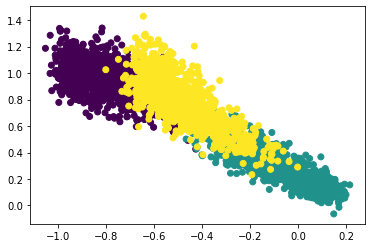

In [76]:
plt.scatter(*y_pred[:,:2].T,c=y)

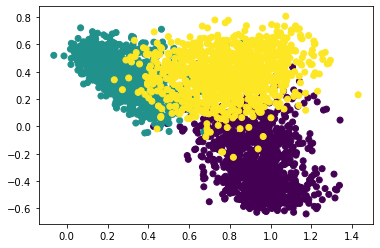

In [77]:
plt.scatter(*y_pred[:,1:].T,c=y)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, np.argmax(y_pred,axis=1)) 

array([[   0, 1000,    0],
       [   0,  445,  555],
       [   0,  958,   42]])

In [21]:
x.shape,y.shape

((2000, 28, 28), (2000,))

In [23]:
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
to_categorical(y)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, np.argmax(y_pred,axis=1)) 

array([[  55,  945],
       [1000,    0]])

Model:
- encoder
- decoder
    
Ahunt:
- fit the model
- control suggestion system
- interface
    
Observatory:
- Data provider

In [225]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [284]:
       
# y = [2,2,3,3,0,0]
# lm = LabelManager(y)

# print(lm.n_class,lm(y,onehot=1))

# lm.update(y)

# y1 = ['a','a','a',3,3,0,0]
# lm.update(y1)
# y1 = lm(y1,onehot=1)
# print(lm.n_class,y1)
# print(lm.to_labels(y1))
    
    
    
x,y,int_mapper,lbl_mapper = load_npz(path,verbose=0)
x = x/x.max()
n_tot,lx,ly = x.shape
# x = x.reshape(n_tot,lx*ly)
x = x[:,:,:,None]
if noise!=0:
    x += np.random.normal(0,noise,x.shape)
n_class,class_labels, nums = describe_labels(y,verbose=0)
#     print(n_class)
outlier_ind = 4

pre_data_config = {0:800,1:900}
obs_plan = 20*[{0:170,1:200,outlier_ind:7}]


x, y, x_pre, y_pre = data_prepare(x,y,pre_data_config)
describe_labels(y_pre,verbose=1)
# x_obs = x_obs_orig.reshape(x_obs_orig.shape[0],-1)
# y_obs1 = y_obs_orig+0

obs = Observetory(obs_plan,x,y)
clf,drt = build_model(shape=(lx*ly),n_class=n_class,n_latent = 64)

tf.keras.backend.clear_session()
print('AHUNT in')

ahunt = AHunt(x_pre, y_pre,interest=None,aug=aug)
ahunt.clf.summary()

ahunt.fit()

n_night = obs.n_plan

for _ in range(n_night):
    x_obs,y_obs = obs.new_obs(safemode=1,nightly=0)
#     describe_labels(y_obs,verbose=1)

    out_obs = y_obs==outlier_ind
    y_true = out_obs.astype(int)
    n_anomaly = np.sum(out_obs)
    ano_inds = np.argwhere(out_obs)[:,0]

    # Method 4
#         true_guess = ano_hunt.human_call1(x_obs,y_obs,n_questions)
    true_guess = ahunt.human_call(x_obs,y_obs,n_questions)
    print(true_guess)

    ahunt.fit()
    scr_ano = ahunt.predict(x_obs)
    trsh = np.sort(scr_ano)[-n_anomaly-1]
    y_pred = scr_ano>trsh
    rws = rws_score(out_obs,scr_ano)
    rc = recall_score(y_true,y_pred)
    pr = precision_score(y_true,y_pred)
    mcc = matthews_corrcoef(y_true,y_pred)
    print(rws,rc,pr,mcc)







    
print('AHUNT out')

# ahunt.fit(reshape=(-1,lx,ly,1))

labels/numbers are:
	0     /   800
 	1     /   900

AHUNT in
colored image
(7, 7, 8)
Model: "Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_____________________________________

In [269]:
# def add_class(clf,drt,n_class = None,loss=None,optimizer=None,metrics=None,summary=False):
    
#     if n_class is None:
#         n_class = clf.layers[-1].output_shape[1]+1
#     if loss is None:
#         loss = clf.loss
#     if optimizer is None:
#         optimizer = clf.optimizer
#     if metrics is None:
#         metrics = clf.metrics_names
#         print(clf.metrics_names)
        
#     w,b = clf.layers[-1].get_weights()

#     inp = keras.Input(shape=clf.layers[0].input_shape[0][1:], name="input")
#     latent = drt(inp)
#     dop = layers.Dropout(clf.layers[-2].rate)(latent)
#     out = layers.Dense(n_class, activation="softmax")(dop)
#     # out = layers.Dense(n_class, activation="sigmoid")(dop)

#     clf2 = keras.Model(inputs=inp, outputs=out, name="Classifier2")

#     #     clf.summary()

#     w_new = np.concatenate([w,clf2.layers[-1].weights[0].numpy()[:,-1:]],axis=-1)
#     b_new = np.concatenate([b,clf2.layers[-1].weights[1].numpy()[-1:]],axis=-1)

#     clf2.layers[-1].set_weights([w_new,b_new])

#     clf2.compile(
#     #     loss=keras.losses.BinaryCrossentropy(),
#         loss=loss,
#         optimizer=optimizer,
#         metrics=metrics,
#     )

#     if summary:
#         clf2.summary()
#     return clf2

# clf,drt = build_model((100),n_class=2,n_latent = 64)
# clf2 = add_class(clf,drt,summary=1)

[]
Model: "Classifier2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 100)]             0         
_________________________________________________________________
DimensionalityReducer (Funct (None, 64)                21184     
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 195       
Total params: 21,379
Trainable params: 21,379
Non-trainable params: 0
_________________________________________________________________


In [267]:
def build_model(shape,n_class,n_latent = 64):
 
    inp = keras.Input(shape=shape, name="input")
    x = layers.Dense(128, activation="relu")(inp)
    latent = layers.Dense(n_latent, activation="relu")(x)
    dop = layers.Dropout(0.6)(latent)
    out = layers.Dense(n_class, activation="softmax")(dop)
    # out = layers.Dense(n_class, activation="sigmoid")(dop)


    clf = keras.Model(inputs=inp, outputs=out, name="Classifier")
    drt = keras.Model(inputs=inp, outputs=latent, name="DimensionalityReducer")

#     clf.summary()

    clf.compile(
    #     loss=keras.losses.BinaryCrossentropy(),
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer='adam',
        metrics=["accuracy"],
    )
    return clf,drt


clf,drt = build_model((100),n_class=2,n_latent = 64)

clf.loss

In [268]:
keras.losses.CategoricalCrossentropy()

In [239]:
np.concatenate([y1,np.zeros((y1.shape[0],1))],axis=1)

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [211]:
np.setdiff1d([1,'2',3],[2,3,4])

array(['1', '2', '3'], dtype='<U21')

In [ ]:
class Suggester

    def ask_human(self,x,y,n_questions,minacc=0.0):
        out_obs = y==self.interest
        ano_inds = np.argwhere(out_obs)[:,0]
        z_clf = self.clf.predict(x)
        scr_ano = z_clf[:,self.interest]
        qlist = np.argsort(scr_ano)[::-1]
        inds_all = []
        inds_interest = []
        for q in qlist:
            mn = 10000
            for asked in self.asked_q:
                dist = np.sum( (x[q]-asked)**2 )
                mn = min(mn,dist)
            if mn>minacc:
                inds_all.append(q)
                if q in ano_inds:
                    inds_interest.append(q)
            if len(inds_all)==n_questions: break
        return inds_all,inds_interest
    
    def human_call1(self,x,y,n_questions,minacc=0.0):
#         ano_inds = np.argwhere(out2)[:,0]

        inds_all,inds_interest = self.ask_human(x,y,n_questions,minacc=minacc)
#         [-n_questions:]
#         inds = np.intersect1d(qinds,ano_inds)
        true_guess = len(inds_interest)
        self.asked_q.extend(x[inds_interest])
        self.x = np.concatenate([x[inds_interest],self.x],axis=0)
        self.n_data = self.x.shape[0]
        self.y = np.concatenate([y[inds_interest],self.y],axis=0)
        return true_guess

    def human_call2(self,x,y,n_questions,minacc=0.0):
#         ano_inds = np.argwhere(out2)[:,0]
#         scr_ano = self.predict(x)
#         qinds = np.argsort(scr_ano)[-n_questions:]
#         inds = np.intersect1d(qinds,ano_inds)
        inds_all,inds_interest = self.ask_human(x,y,n_questions,minacc=minacc)
        true_guess = len(inds_interest)
        self.asked_q.extend(x[inds_all])
        self.x = np.concatenate([x[inds_all],self.x],axis=0)
        self.n_data = self.x.shape[0]
        self.y = np.concatenate([y[inds_all],self.y],axis=0)
        return true_guess
